<a href="https://colab.research.google.com/github/LucassZhou/Customer-Segmentation-for-Marketing-Strategies/blob/main/Customer_Segmentation_for_Marketing_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction:**

Customer segmentation is a pivotal strategy in modern marketing, enabling businesses to deliver more personalized services and efficiently allocate marketing resources. In this project, we leverage a comprehensive dataset sourced from Kaggle to delve into the shopping behaviors and preferences of consumers. Through meticulous analysis, our goal is to identify distinct clusters within the customer base. These segments will help tailor marketing approaches to better meet the specific needs and expectations of different customer groups, ultimately enhancing decision-making processes in marketing campaigns.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Loading the Dataset:

In [27]:
data_path = '/content/shopping_behavior_updated.csv'
data = pd.read_csv(data_path)
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Analysis of Purchase Frequency, Category, and Gender Distribution:

In [28]:
frequency_counts = data['Frequency of Purchases'].value_counts()

category_counts = data['Category'].value_counts()

gender_counts = data['Gender'].value_counts()

Plot the distributions of Purchase Frequency, Category, and Gender.

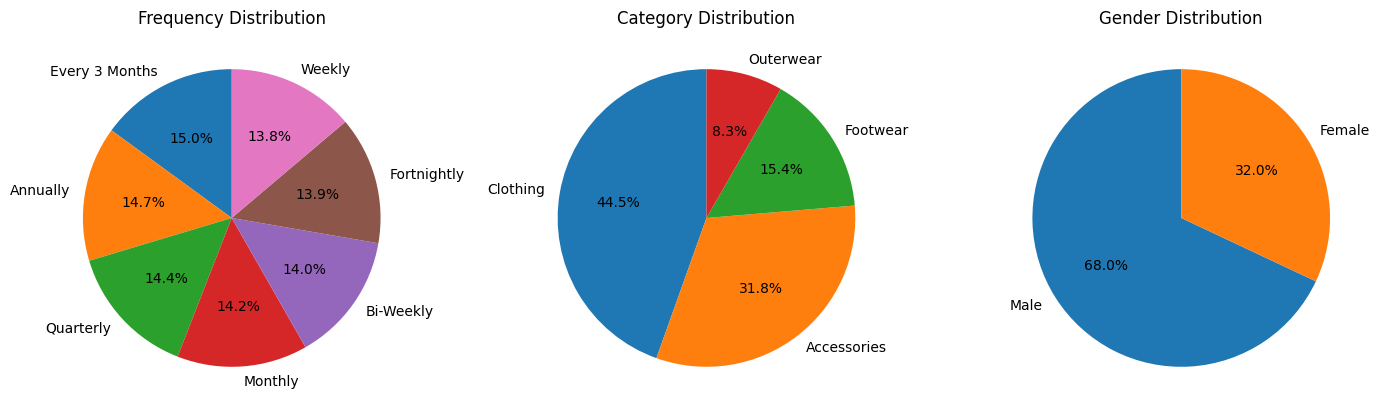

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(14, 7))

ax[0].pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Frequency Distribution')

ax[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Category Distribution')

ax[2].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
ax[2].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

Plot the distributions of Age, Purchase Amount, and Previous Purchases.

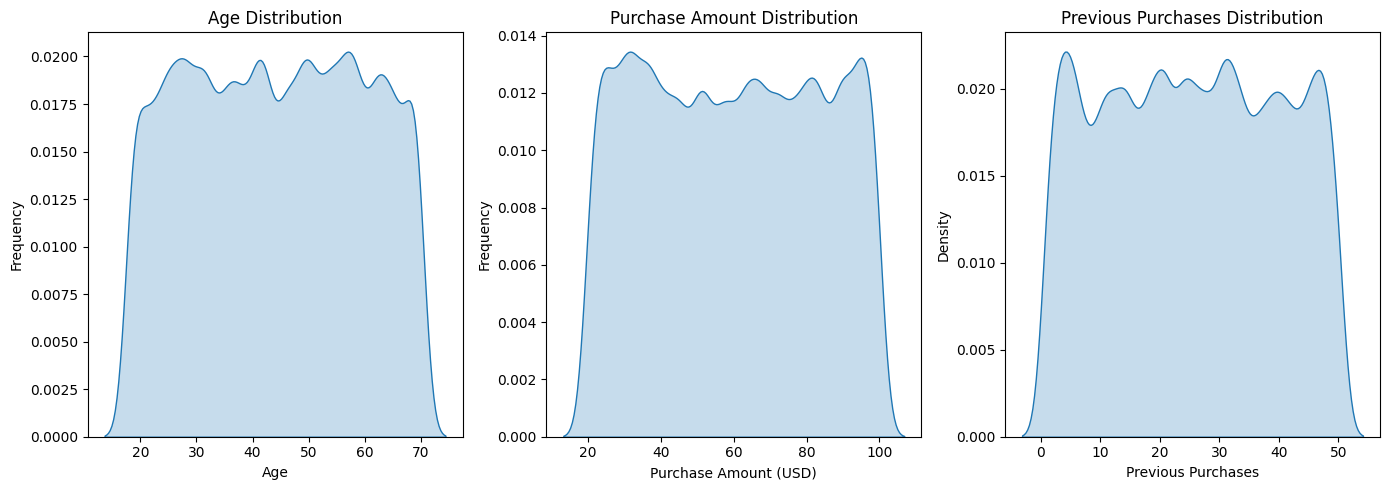

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

sns.kdeplot(data['Age'], bw_adjust=0.5, fill=True, ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

sns.kdeplot(data['Purchase Amount (USD)'], bw_adjust=0.5, fill=True, ax=ax[1])
ax[1].set_title('Purchase Amount Distribution')
ax[1].set_xlabel('Purchase Amount (USD)')
ax[1].set_ylabel('Frequency')

sns.kdeplot(data['Previous Purchases'], bw_adjust=0.5, fill=True, ax=ax[2])
ax[2].set_title('Previous Purchases Distribution')
ax[2].set_xlabel('Previous Purchases')

plt.tight_layout()
plt.show()

Plot the distributions of Review Rating, Season, and Shipping Type.

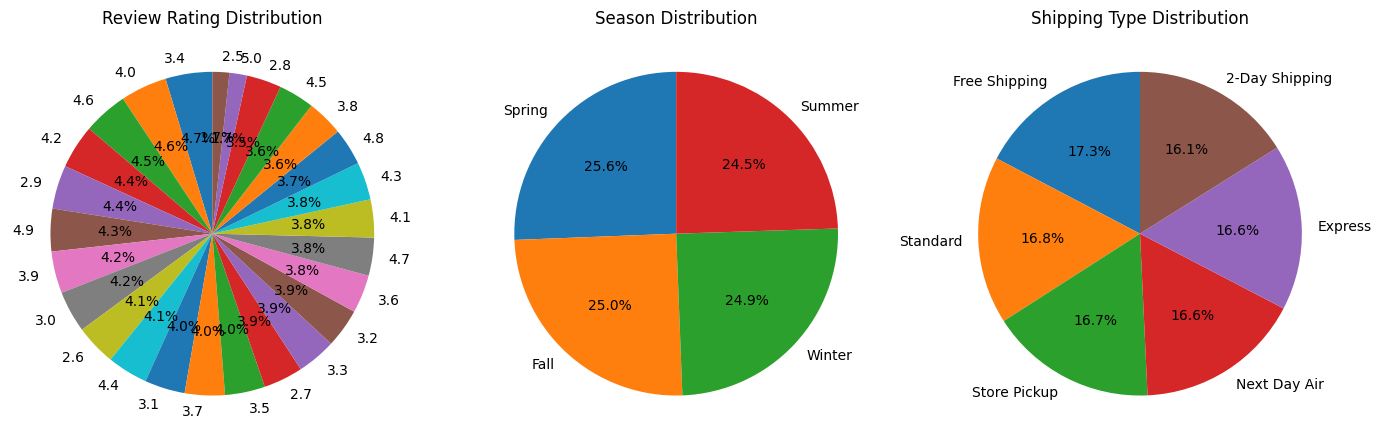

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

rating_counts = data['Review Rating'].value_counts()
ax[0].pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Review Rating Distribution')


season_counts = data['Season'].value_counts()
ax[1].pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Season Distribution')

Shipping_counts = data['Shipping Type'].value_counts()
ax[2].pie(Shipping_counts, labels=Shipping_counts.index, autopct='%1.1f%%', startangle=90)
ax[2].set_title('Shipping Type Distribution')

plt.tight_layout()
plt.show()

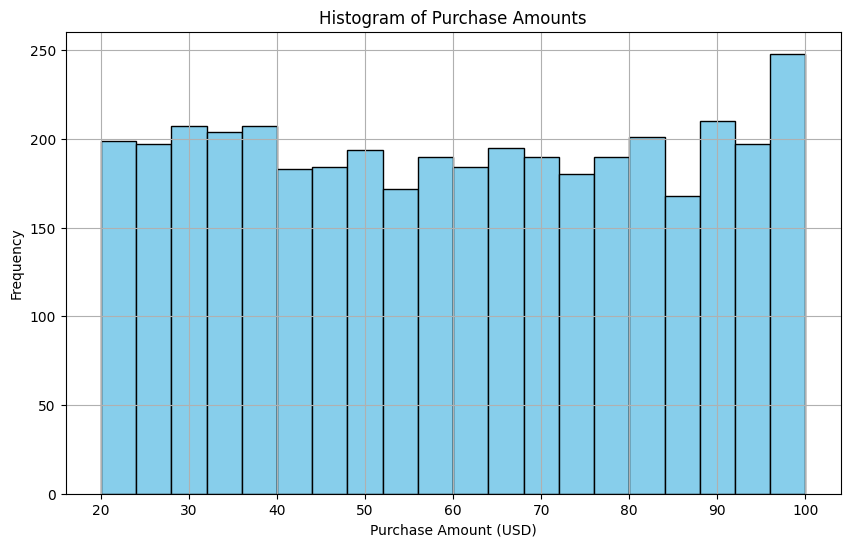

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(data['Purchase Amount (USD)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

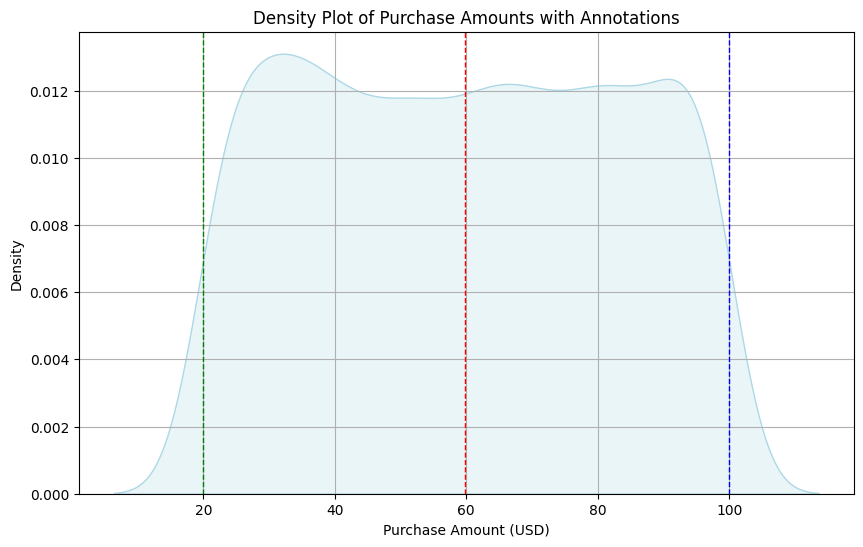

In [33]:
average_purchase = data['Purchase Amount (USD)'].mean()
min_purchase = data['Purchase Amount (USD)'].min()
max_purchase = data['Purchase Amount (USD)'].max()

plt.figure(figsize=(10, 6))
sns.kdeplot(data['Purchase Amount (USD)'], fill=True, color='lightblue')
plt.axvline(average_purchase, color='red', linestyle='dashed', linewidth=1)
plt.axvline(min_purchase, color='green', linestyle='dashed', linewidth=1)
plt.axvline(max_purchase, color='blue', linestyle='dashed', linewidth=1)
plt.title('Density Plot of Purchase Amounts with Annotations')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [34]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

We now transform the text data into numberic data.

In [35]:
print("Original Data:")
print(data.head())

gender_mapping = data['Gender'].value_counts(normalize=True)

Item_Purchased_frequancy = data['Item Purchased'].value_counts(normalize=True)

category_mapping = data['Category'].value_counts(normalize=True)

Location_mapping = data['Location'].value_counts(normalize=True)

Size_mapping = data['Size'].value_counts(normalize=True)

Color_mapping = data['Color'].value_counts(normalize=True)

Season_mapping = data['Season'].value_counts(normalize=True)

subscription_status_mapping = data['Subscription Status'].value_counts(normalize=True)

Shipping_Type_mapping = data['Shipping Type'].value_counts(normalize=True)

Discount_Applied_mapping = data['Discount Applied'].value_counts(normalize=True)

Promo_Code_Used_mapping = data['Promo Code Used'].value_counts(normalize=True)

Payment_Method_mapping = data['Payment Method'].value_counts(normalize=True)

Frequency_of_Purchases_mapping = data['Frequency of Purchases'].value_counts(normalize=True)


Original Data:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo C

The data after the transformation:

In [36]:
data['Gender'] = data['Gender'].map(gender_mapping)

data['Item Purchased' ] = data['Item Purchased'].map(Item_Purchased_frequancy)

data['Category'] = data['Category'].map(category_mapping)

data['Location' ] = data['Location'].map(Location_mapping)

data['Size'] = data['Size'].map(Size_mapping)

data['Color' ] = data['Color'].map(Color_mapping)

data['Season'] = data['Season'].map(Season_mapping)

data['Subscription Status'] = data['Subscription Status'].map(subscription_status_mapping)

data['Shipping Type'] = data['Shipping Type'].map(Shipping_Type_mapping)

data['Discount Applied'] = data['Discount Applied'].map(Discount_Applied_mapping)

data['Promo Code Used'] = data['Promo Code Used'].map(Promo_Code_Used_mapping)

data['Payment Method'] = data['Payment Method'].map(Payment_Method_mapping)

data['Frequency of Purchases'] = data['Frequency of Purchases'].map(Frequency_of_Purchases_mapping)


print("\nData after mapping:")
print(data.head())


Data after mapping:
   Customer ID  Age  Gender  Item Purchased  Category  Purchase Amount (USD)  \
0            1   55    0.68        0.043846  0.445385                     53   
1            2   19    0.68        0.042051  0.445385                     64   
2            3   50    0.68        0.031795  0.445385                     73   
3            4   21    0.68        0.041026  0.153590                     90   
4            5   45    0.68        0.043846  0.445385                     49   

   Location  Size     Color    Season  Review Rating  Subscription Status  \
0  0.020256  0.27  0.040769  0.248974            3.1                 0.27   
1  0.019744  0.27  0.040513  0.248974            3.1                 0.27   
2  0.018462  0.17  0.040513  0.256154            3.1                 0.27   
3  0.016154  0.45  0.040513  0.256154            3.5                 0.27   
4  0.018974  0.45  0.037179  0.256154            2.7                 0.27   

   Shipping Type  Discount Applied 

Evaluate the correlation between the features:

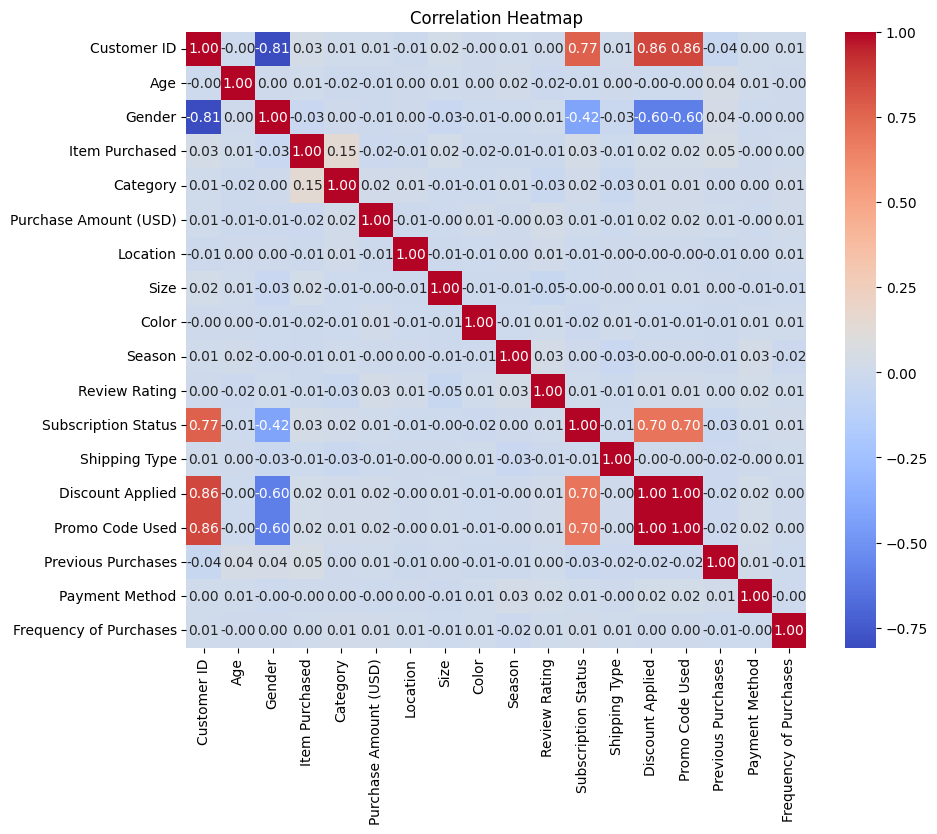

In [37]:
import seaborn as sns

# Compute the correlation matrix
corr = data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There is strong relationship between Promo Code Used and Discount Applied.

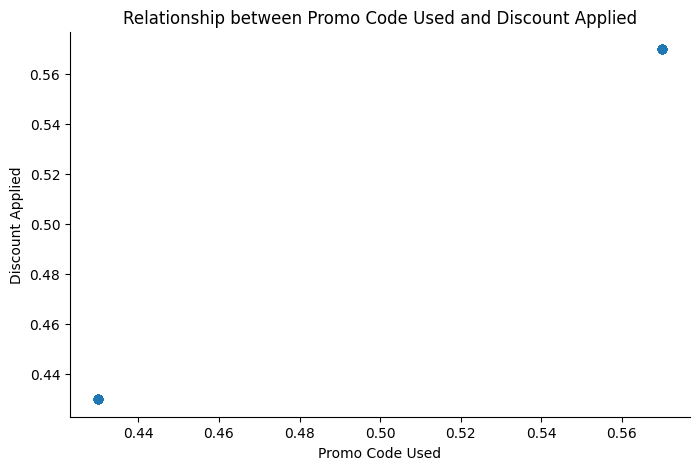

In [38]:

plt.figure(figsize=(8, 5))
plt.scatter(data['Promo Code Used'], data['Discount Applied'], s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Relationship between Promo Code Used and Discount Applied')
plt.xlabel('Promo Code Used')
plt.ylabel('Discount Applied')
plt.show()


Data Clustering:

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [40]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster results to dataframe
data['Cluster'] = clusters

In [41]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_scaled, clusters)
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.189


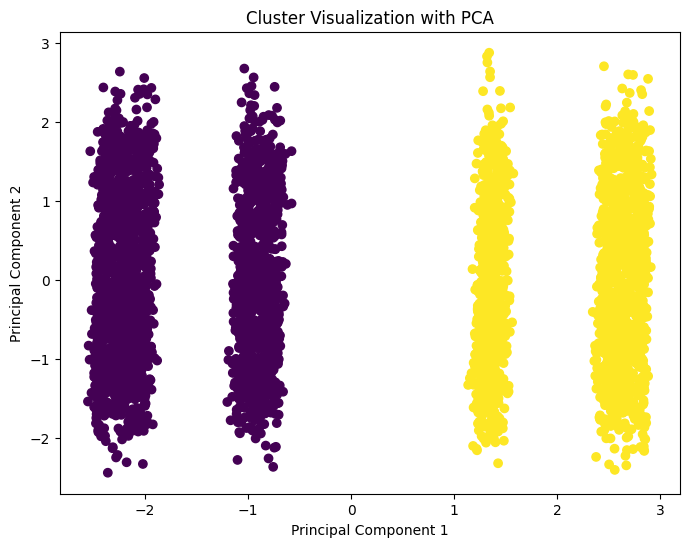

In [42]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=clusters)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [43]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(data_scaled)

# Results
data['Cluster'] = clusters
print(data)

      Customer ID  Age  Gender  Item Purchased  Category  \
0               1   55    0.68        0.043846  0.445385   
1               2   19    0.68        0.042051  0.445385   
2               3   50    0.68        0.031795  0.445385   
3               4   21    0.68        0.041026  0.153590   
4               5   45    0.68        0.043846  0.445385   
...           ...  ...     ...             ...       ...   
3895         3896   40    0.32        0.038718  0.445385   
3896         3897   52    0.32        0.036667  0.317949   
3897         3898   46    0.32        0.041282  0.317949   
3898         3899   44    0.32        0.038462  0.153590   
3899         3900   52    0.32        0.039231  0.317949   

      Purchase Amount (USD)  Location  Size     Color    Season  \
0                        53  0.020256  0.27  0.040769  0.248974   
1                        64  0.019744  0.27  0.040513  0.248974   
2                        73  0.018462  0.17  0.040513  0.256154   
3          

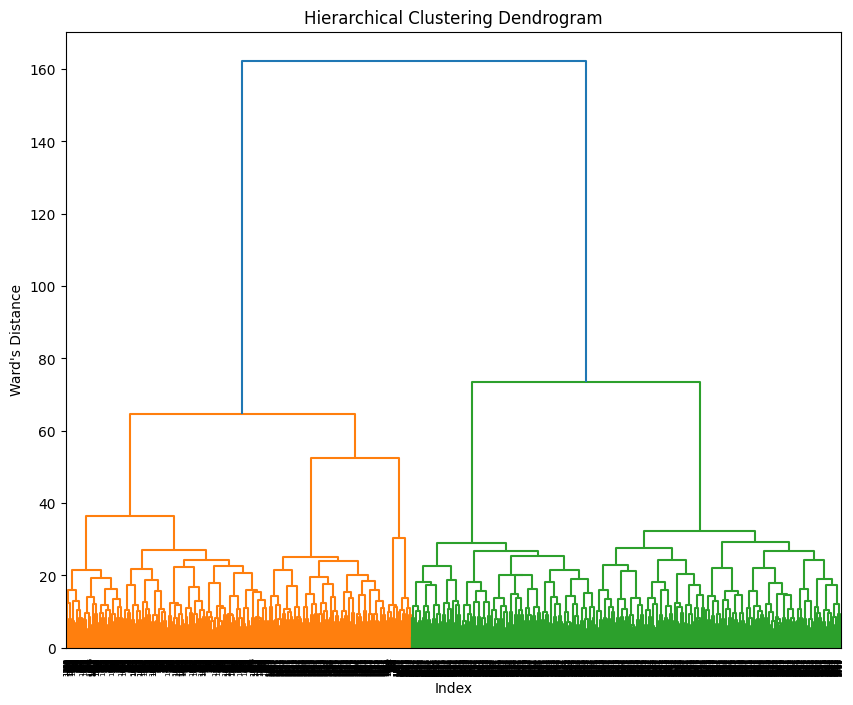

      Customer ID  Age  Gender  Item Purchased  Category  \
0               1   55    0.68        0.043846  0.445385   
1               2   19    0.68        0.042051  0.445385   
2               3   50    0.68        0.031795  0.445385   
3               4   21    0.68        0.041026  0.153590   
4               5   45    0.68        0.043846  0.445385   
...           ...  ...     ...             ...       ...   
3895         3896   40    0.32        0.038718  0.445385   
3896         3897   52    0.32        0.036667  0.317949   
3897         3898   46    0.32        0.041282  0.317949   
3898         3899   44    0.32        0.038462  0.153590   
3899         3900   52    0.32        0.039231  0.317949   

      Purchase Amount (USD)  Location  Size     Color    Season  \
0                        53  0.020256  0.27  0.040769  0.248974   
1                        64  0.019744  0.27  0.040513  0.248974   
2                        73  0.018462  0.17  0.040513  0.256154   
3          

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(data_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z, labels=data.index.astype(str))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Ward\'s Distance')
plt.show()

# To form flat clusters from the hierarchical clustering output
from scipy.cluster.hierarchy import fcluster
k = 3  # Number of clusters
clusters = fcluster(Z, k, criterion='maxclust')
data['Cluster'] = clusters
print(data)